# Imports

In [3]:
import sys
sys.path.append('..')

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import alignment.alignment_utils as utils

# Load in data

In [5]:
DATA_PATH = '../data/'
data_filename = DATA_PATH + 'pt_decoding_data_S22.pkl'

In [7]:
all_pt_data = utils.load_pkl(data_filename)

In [10]:
pt = 'S22'
pt_data = all_pt_data[pt]
print(pt_data.keys())

dict_keys(['ID', 'X1', 'X1_map', 'y1', 'X2', 'X2_map', 'y2', 'X3', 'X3_map', 'y3', 'y_full_phon', 'X_collapsed', 'y_phon_collapsed', 'y_artic_collapsed', 'pre_pts'])


# Phoneme label processing

In [14]:
phon_labels = ['a', 'ae', 'i', 'u', 'b', 'p', 'v', 'g', 'k']
artic_labels = ['low', 'high', 'labial', 'dorsal']
phon_to_artic_dict = {1:1, 2:1, 3:2, 4:2, 5:3, 6:3, 7:3, 8:4, 9:4}

In [13]:
def phon_to_artic(phon_idx, phon_to_artic_conv):
    return phon_to_artic_conv[phon_idx]

def phon_to_artic_seq(phon_seq, phon_to_artic_conv):
    flat_seq = phon_seq.flatten()
    artic_conv = np.array([phon_to_artic(phon_idx, phon_to_artic_conv) for phon_idx in flat_seq])
    return np.reshape(artic_conv, phon_seq.shape)

def phon2artic(phon):
    return artic_labels[phon_to_artic_dict[int(phon)] - 1]

def phon2artic_seq(phon_seq):
    return '_'.join([phon2artic(phon) for phon in phon_seq])

def labels2cv_seq(labels):
    labels_str = []
    for lab in labels:
        labels_str.append(labels2cv(lab))
    return np.array(labels_str)

def labels2cv(str):
    middle_val = str[1]
    if int(middle_val) < 5:
        return 'CVC'
    else:
        return 'VCV'

# Data Visualization

In [48]:
p_ind = 1
pt_trace = pt_data[f'X{p_ind}']
pt_phon_labels = pt_data[f'y{p_ind}']
pt_artic_labels = phon_to_artic_seq(pt_phon_labels, phon_to_artic_dict)

In [49]:
pt_artic_labels

array([1, 4, 4, 3, 2, 1, 4, 4, 1, 1, 3, 3, 3, 4, 3, 1, 2, 4, 2, 1, 2, 2,
       1, 3, 4, 4, 2, 4, 1, 3, 3, 2, 4, 3, 2, 3, 3, 1, 4, 3, 1, 3, 1, 1,
       2, 4, 2, 2, 2, 2, 3, 3, 2, 2, 3, 4, 3, 1, 1, 3, 4, 4, 1, 2, 1, 1,
       3, 1, 4, 4, 4, 2, 3, 2, 3, 3, 1, 3, 2, 2, 3, 4, 4, 3, 2, 2, 3, 4,
       2, 2, 2, 2, 4, 1, 2, 3, 1, 4, 1, 4, 1, 3, 1, 3, 1, 4, 4, 3, 3, 4,
       1, 4, 2, 2, 1, 2, 1, 2, 3, 1, 1, 2, 3, 1, 3, 2, 2, 3, 3, 2, 3, 3,
       3, 4, 1, 2, 2, 4, 2, 3, 2, 1, 4, 2, 1, 1, 4, 4, 3, 4, 4])

## HG Traces (TODO)

## TSNE Scatters

In [50]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [51]:
t = np.linspace(-0.5, 0.5 - 1/pt_trace.shape[1], pt_trace.shape[1])
zero_ind = np.where(t == 0)[0][0]

perp = 30
tsne_comp = 2

# pt_embed_t0 = TSNE(n_components=tsne_comp, perplexity=perp).fit_transform(pt_trace[:,zero_ind,:])

t_pca_comp = 0.8
pt_time_pca = PCA(n_components=t_pca_comp).fit_transform(pt_trace.reshape(pt_trace.shape[0], -1))
pt_embed_time = TSNE(n_components=tsne_comp, perplexity=perp).fit_transform(pt_time_pca)


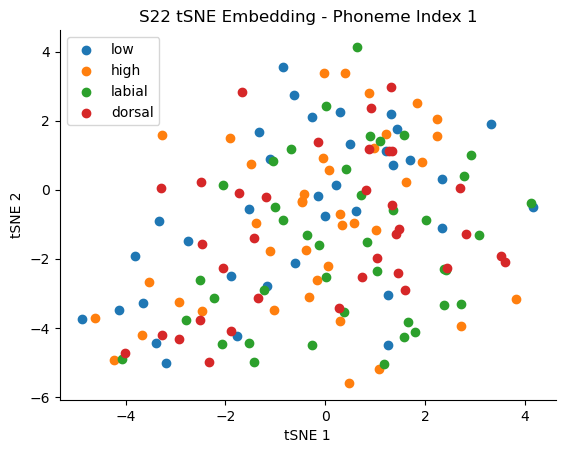

In [52]:
fig_data = pt_embed_time
fig_labels = pt_artic_labels
fig_label_names = artic_labels

plt.figure()
for lab in np.unique(fig_labels):
    plt.scatter(fig_data[np.where(fig_labels == lab)[0],0], fig_data[np.where(fig_labels == lab)[0],1], label=fig_label_names[lab-1])
# plt.scatter(S14_embed_t0[:,0], S14_embed_t0[:,1], c=S14_artic_labels[:,0])
plt.xlabel('tSNE 1')
plt.ylabel('tSNE 2')
plt.title(f'{pt} tSNE Embedding - Phoneme Index {p_ind}')
plt.legend()

sns.despine()
plt.show()